In [1]:
import os
import matplotlib.pyplot as plt
import netCDF4 as nc
from netCDF4 import Dataset
import numpy as np
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [2]:
fname = os.path.join('C:/Users/htc/Desktop/DATA/AROME DATA/tmax_Aoutmax.nc')
ds=nc.Dataset(fname)
print(ds.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    bounds: time_bnds
    units: days since 2020-06-01 00:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (1,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (1, 2)
filling on, default _FillValue of 9.969209968386869e+36 used, 'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (352,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (687,)
filling o

<ipython-input-2-93ac15352327>:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(ds.variables)


In [3]:
lats = ds.variables['latitude'][:]
lons = ds.variables['longitude'][:]
m = ds.variables['mx2t6']

In [4]:
lon2d, lat2d = np.meshgrid(lons, lats)
datar = m[0,:,:]-273.15

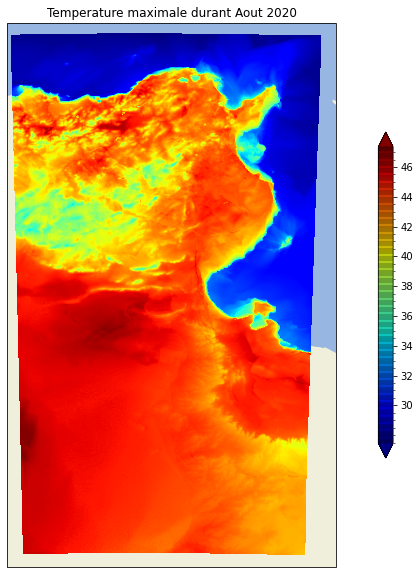

In [5]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
mp=ax.imshow(datar, extent=(lons.min(), lons.max(), lats.min(), lats.max()), cmap='jet', origin='upper')
plt.title('Temperature maximale durant Aout 2020', fontsize=12)
#ax.add_feature(cfeature.BORDERS, edgecolor='black')
#ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
cbar=fig.colorbar(mp, orientation='vertical', shrink=0.6 ,drawedges='True', ticks=np.arange(30, 48, 2), extend='both')
cbar.minorticks_on()
#gl=ax.gridlines(draw_labels=True, alpha=0.1)
#gl.down_labels=False
#gl.right_labels= False
plt.show()
fig.savefig('Tmax_Aout2020.png')